In [1]:
!pip list

Package                        Version


------------------------------ --------------------
absl-py                        1.3.0
aiohttp                        3.8.3
aiosignal                      1.3.1
alabaster                      0.7.12
altair                         4.2.2
anaconda-client                1.11.0
anaconda-navigator             2.3.1
anaconda-project               0.11.1
antlr4-python3-runtime         4.9.3
anyio                          3.5.0
appdirs                        1.4.4
argon2-cffi                    21.3.0
argon2-cffi-bindings           21.2.0
arrow                          1.2.2
astroid                        2.11.7
astropy                        5.1
astunparse                     1.6.3
async-generator                1.10
async-timeout                  4.0.2
atomicwrites                   1.4.0
attrs                          21.4.0
autograd                       1.5
Automat                        20.2.0
automata-lib                   7.1.0
autopep8                       1.6.0
autoray            

In [2]:
!pip install opencv-python matplotlib imageio gdown tensorflow

^C


In [1]:
#gdown download our datasets.

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio
import gdown

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# Loading data function 

In [4]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=44d1e25e-ee2c-47dc-81cf-64030d355466
To: C:\Users\Tanishq\Lip Reading\data.zip
100%|███████████████████████████████████████████████████████████████████████████████| 423M/423M [00:51<00:00, 8.19MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [5]:
def load_video(path:str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret,frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32)/std

In [6]:
voc = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [7]:
voc

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [8]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=voc, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [9]:
char_to_num(['n','l','p'])

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([14, 12, 16], dtype=int64)>

In [10]:
 def load_alignments(path:str) -> List[str]:
        with open(path, 'r') as f:
            lines = f.readlines()
        tokens = []
        for line in lines:
            line = line.split()
            if line[2] != 'sil':
                tokens = [*tokens, ' ', line[2]]
        return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding = 'UTF-8'),(-1)))[1:]

In [11]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    #file name spliting for mac/linux(for those who uses linux or window)
    #file_name = path.split('/')[-1].split('.')[0]
    #file name splitting for windows.
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [12]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [13]:
tf.convert_to_tensor(test_path)

<tf.Tensor: shape=(), dtype=string, numpy=b'.\\data\\s1\\bbal6n.mpg'>

In [14]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [15]:
frames,alignments

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[ 1.4603739 ],
          [ 1.4603739 ],
          [ 1.4209043 ],
          ...,
          [ 0.15787826],
          [ 0.19734782],
          [ 0.07893913]],
 
         [[ 1.4603739 ],
          [ 1.4603739 ],
          [ 1.4209043 ],
          ...,
          [ 0.15787826],
          [ 0.07893913],
          [ 0.03946957]],
 
         [[ 1.4209043 ],
          [ 1.4209043 ],
          [ 1.3814348 ],
          ...,
          [ 0.07893913],
          [ 0.07893913],
          [ 0.07893913]],
 
         ...,
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          ...,
          [ 9.94633   ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          ...,
          [ 9.90686   ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          

In [16]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4603739 ],
         [ 1.4603739 ],
         [ 1.4209043 ],
         ...,
         [ 0.15787826],
         [ 0.19734782],
         [ 0.07893913]],

        [[ 1.4603739 ],
         [ 1.4603739 ],
         [ 1.4209043 ],
         ...,
         [ 0.15787826],
         [ 0.07893913],
         [ 0.03946957]],

        [[ 1.4209043 ],
         [ 1.4209043 ],
         [ 1.3814348 ],
         ...,
         [ 0.07893913],
         [ 0.07893913],
         [ 0.07893913]],

        ...,

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.94633   ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.90686   ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.90686   ],
         [ 9.86739

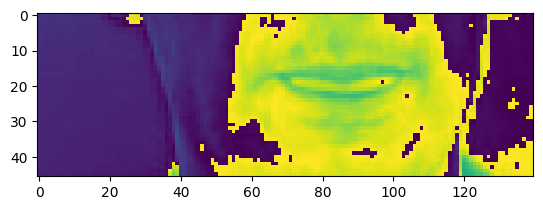

In [17]:
plt.imshow(frames[10])

In [18]:
print([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

['b', 'i', 'n', ' ', 'b', 'l', 'u', 'e', ' ', 'a', 't', ' ', 'l', ' ', 's', 'i', 'x', ' ', 'n', 'o', 'w']


In [19]:
def mappable_function(path: str) -> List[str]:
    result = tf.py_function(load_data,[path], (tf.float32,tf.int64))
    return result #this is required for the data pipline function

RECAP: 
so basically we created functions. first we loaded the data or dataset. Then we created a preprocessing function for loading the video. Then we defined vocabulary which contains the vocab, numbers and symbols used. After that we created char to num and num to char function.Then we created load alignment and data function. Then we went on testing with a sample data i.e test_path which return a bunch of frames which focuses on the person's mouth which then we combine it to form a moving in the video section. Then we converted alignments to an encoded sequence which will be pass on to the ml model.

# Creating data Pipeline

Here, we need to create a data pipeline for training the deep learning model, as tensorflow will draw random samples from our datasets in order to complete one training set. And yea we also need to look at the data to make sure our transformation have worked successfully.

In [20]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40])) # here we're not really padding out the video,we're gonna ensure that we have 75 frames and not gonna pad out the actual image also. Basically we're just ensuring that we have 75 frames for each videos and have 40 tokens for each videos. What if we have tokens less than 40, it'll pad out to 0.
data = data.prefetch(tf.data.AUTOTUNE)
#adding training and testing split
train = data.take(450)
test = data.skip(450)

In [21]:
len(test)

50

In [22]:
len(train)

450

In [23]:
frames, alignments = data.as_numpy_iterator().next()

In [24]:
alignments

array([[16, 12,  1,  3,  5, 39, 18,  5,  4, 39,  2, 25, 39, 17, 39, 26,
         5, 18, 15, 39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [19,  5, 20, 39,  7, 18,  5,  5, 14, 39,  2, 25, 39, 16, 39,  6,
        15, 21, 18, 39, 14, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [25]:
test = data.as_numpy_iterator()

In [26]:
val = test.next(); val[0] #val[0] returns frames

array([[[[[ 1.3447905 ],
          [ 1.3447905 ],
          [ 1.4670441 ],
          ...,
          [10.350812  ],
          [10.391562  ],
          [10.391562  ]],

         [[ 1.3447905 ],
          [ 1.3447905 ],
          [ 1.4670441 ],
          ...,
          [10.350812  ],
          [10.391562  ],
          [10.391562  ]],

         [[ 1.3040392 ],
          [ 1.3040392 ],
          [ 1.3040392 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         ...,

         [[ 0.896527  ],
          [ 0.896527  ],
          [ 0.896527  ],
          ...,
          [10.187806  ],
          [10.187806  ],
          [10.187806  ]],

         [[ 0.896527  ],
          [ 0.896527  ],
          [ 0.896527  ],
          ...,
          [10.147056  ],
          [10.147056  ],
          [10.147056  ]],

         [[ 0.896527  ],
          [ 0.896527  ],
          [ 0.896527  ],
          ...,
          [10.147056  ],
          [10.147056  ],
          

In [27]:
gif = imageio.mimsave('./animation.gif', val[0][0], fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to u

Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.391562461853027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to u

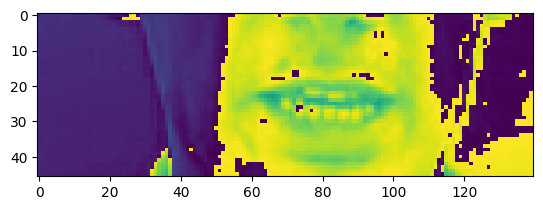

In [28]:
# first 0: videos , second 0: give me the 1st video out of the batch, third 0: give me the 1st frame in the video
plt.imshow(val[0][0][35])

In [29]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin white at a three again'>

RECAP:
So basically we created a data pipeline. First we went for creating a tensorflow dataset then we tested it out with ".as_numpy_iterator()" and for grabing the next instance we used ".next()". Then for converting numpy array into a gif we used "imageio.mimsave". Then we went through the preprocessed images and annotations.
Another Thing!
we created a data pipline(the first block in this section) so it's not necessary to create testing training and validation section. orelse you could create it and ignore this data pipeline as you wish!! PEACE..

# Creating deep neural network.

for building this model we need to use 3d convolution to surpass the videos and then condense it down to classification dense layer which predicts charecters.
We're gonna use a loss fuction called CTC(connectionist temporal classification) to handle the output. Why to use it? because, it works well with the word transcriptions that aren't specifically aligned to frames, given the structure of this model it's likely to repeat same letter or words multiple time. If we use the standard loss function(standard entropy) this will make the model looks like our model's way up. So CTC comes here were it reduces the duplicates using some special tokens.
As we can see that our dataset is already alligned, so what's the use? Yes, but when it eventually comes on subbing out the data on the data which we create, it's gonna be way more cost effective to simply use a non-allign data.

In [30]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [31]:
char_to_num.vocab_size()

40

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [33]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))
model.add(Conv3D(256, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))
model.add(Conv3D(75, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))
model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences = True)))
model.add(Dropout(.5))#do lil bit of regularization of about 50% in both LSTM
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences = True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1,kernel_initializer='he_normal', activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [35]:
pred = model.predict(val[0])

1/1 [==============================] - 3s 3s/step


In [36]:
pred[0].shape

(75, 41)

In [37]:
tf.argmax(pred[0],axis=1)

<tf.Tensor: shape=(75,), dtype=int64, numpy=
array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 30,
       30, 30,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6, 19, 19], dtype=int64)>

In [38]:
tf.strings.reduce_join([num_to_char(tf.argmax(x))for x in pred[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'fffffffffffffffffffffffffffffffff111fffffffffffffffffffffffffffffffffffffss'>

In [39]:
model.input_shape

(None, 75, 46, 140, 1)

In [40]:
model.output.shape

TensorShape([None, 75, 41])

RECAP:
so in here we imported our dependences, then we created or defined our neural network in which it has an parameters around 8.5M, then we passed through some frames to get a certain set of predictions.

# Setup Training options and train

In [41]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr*tf.math.exp(-0.1)

In [42]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [43]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [44]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss=CTCLoss)


In [45]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [46]:
schedule_callback = LearningRateScheduler(scheduler)

In [47]:
example_callback = ProduceExample(data)

In [48]:
model.fit(train,validation_data = test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100
  3/450 [..............................] - ETA: 3:22:33 - loss: 189.1523

KeyboardInterrupt: 

# Making Predictions

In [49]:
import gdown

In [50]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=e14e8a0c-3320-4a01-82f2-3aeac2e597fe
To: C:\Users\Tanishq\Lip Reading\checkpoints.zip
100%|█████████████████████████████████████████████████████████████████████████████| 94.5M/94.5M [00:21<00:00, 4.39MB/s]


['models\\checkpoint.index',
 'models\\__MACOSX/._checkpoint.index',
 'models\\checkpoint.data-00000-of-00001',
 'models\\__MACOSX/._checkpoint.data-00000-of-00001',
 'models\\checkpoint',
 'models\\__MACOSX/._checkpoint']

In [51]:
model.load_weights('models/checkpoint')

In [52]:
test_data = data.as_numpy_iterator()

In [53]:
sample = test_data.next()

In [54]:
pred = model.predict(sample[0])

1/1 [==============================] - 2s 2s/step


In [55]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set red with b eight now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay red at r three again'>]

In [56]:
decoded = tf.keras.backend.ctc_decode(pred, input_length=[75,75], greedy=True)[0][0].numpy()

In [57]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set red with b eight now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay red at r three again'>]

# Sample Testing

In [72]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bbal9a.align'))

In [73]:
pred = model.predict(tf.expand_dims(sample[0],axis=0))

1/1 [==============================] - 1s 768ms/step


In [74]:
pred.shape

(1, 75, 41)

In [75]:
sample[1]

<tf.Tensor: shape=(24,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 14,  9, 14,
        5, 39,  1,  7,  1,  9, 14], dtype=int64)>

In [76]:
print('REAL TEXT IS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

REAL TEXT IS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l nine again'>]

In [77]:
decoded = tf.keras.backend.ctc_decode(pred, input_length=[75], greedy=True)[0][0].numpy()

In [78]:
print('PREDICTIONS IS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

PREDICTIONS IS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l nine again'>]

RECAP:
1. installing and importing our dependencies
2. building our data loading function
3. then we divided training and testing
4. and yes we created our data pipeline
5. Then we built and designed our neural network
6. which was taken an referance from a paper(https://arxiv.org/abs/1611.01599) but we used LSTM and they used GRU
7. Then we trained it with the customed loss function (i.e CTC loss function), callbacks and learning rate scheduler
8. and atlast we made some predictions
9. That's it we're done with the main code part now we're gonna make a webApp using streamlit. Hope you'll liked this project
PEACE :-)